# Классификация пассажиров автобуса на входящих и выходящих с использованием сверточной нейронной сети

## Суворов Роман

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import time

IMAGE_PATH = 'bus/'


CLASS_LIST = sorted([d for d in os.listdir(IMAGE_PATH) if os.path.isdir(os.path.join(IMAGE_PATH, d))])
CLASS_COUNT = len(CLASS_LIST)
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

In [ ]:

data_files = []
data_labels = []

for class_label in range(CLASS_COUNT):
    class_name = CLASS_LIST[class_label]
    class_path = IMAGE_PATH + class_name
    class_files = os.listdir(class_path)
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]
    data_labels += [class_label] * len(class_files)

print(f'Общий размер базы: {len(data_labels)}')

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото
Общий размер базы: 9081


In [ ]:

IMG_WIDTH = 128
IMG_HEIGHT = 128


X_train, X_val, y_train, y_val = train_test_split(
    data_files, data_labels, test_size=0.2, random_state=42, stratify=data_labels
)


def load_and_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 
    return img_array


X_train_images = np.array([load_and_preprocess_image(f) for f in X_train])
X_val_images = np.array([load_and_preprocess_image(f) for f in X_val])
y_train = np.array(y_train)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/adamenko_ss/Desktop/personal/herzen/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-18 12:47:32.802387: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-05-18 12:47:32.802587: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-05-18 12:47:32.802600: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-05-18 12:47:32.802801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-18 12:47:32.802831: I tensorflow/core/common_runtime/pluggable_device/p

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,209 (24.86 MB)

 Trainable params: 6,517,249 (24.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:

start_time = time.time()
batch_size = 32
epochs = 20

history = model.fit(
    datagen.flow(X_train_images, y_train, batch_size=batch_size),
    validation_data=(X_val_images, y_val),
    epochs=epochs,
    steps_per_epoch=len(X_train_images) // batch_size,
    verbose=1
)

print(f'Время обучения: {time.time() - start_time:.2f} секунд')

Epoch 1/20


/Users/adamenko_ss/Desktop/personal/herzen/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-05-18 12:47:34.441428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


227/227 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.6106 - loss: 0.8302 - val_accuracy: 0.3445 - val_loss: 0.9111
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.7247 - loss: 0.5850 - val_accuracy: 0.7050 - val_loss: 0.5431
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.7466 - loss: 0.5420 - val_accuracy: 0.8090 - val_loss: 0.4097
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.7660 - loss: 0.4997 - val_accuracy: 0.8145 - val_loss: 0.4049
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.7880 - loss: 0.4721 - val_accuracy: 0.8729 - val_loss: 0.3261
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.7870 - loss: 0.4773 - val_accuracy: 0.8382 - val_loss: 0.3694
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.7951 - loss: 0.4534 - val_accuracy: 0.8354 - val_loss: 0.3817
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.8047 - loss: 0.4493 - val_accurac

In [ ]:

val_loss, val_accuracy = model.evaluate(X_val_images, y_val)
print(f'Точность на проверочной выборке: {val_accuracy * 100:.2f}%')

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8676 - loss: 0.2956
Точность на проверочной выборке: 87.34%


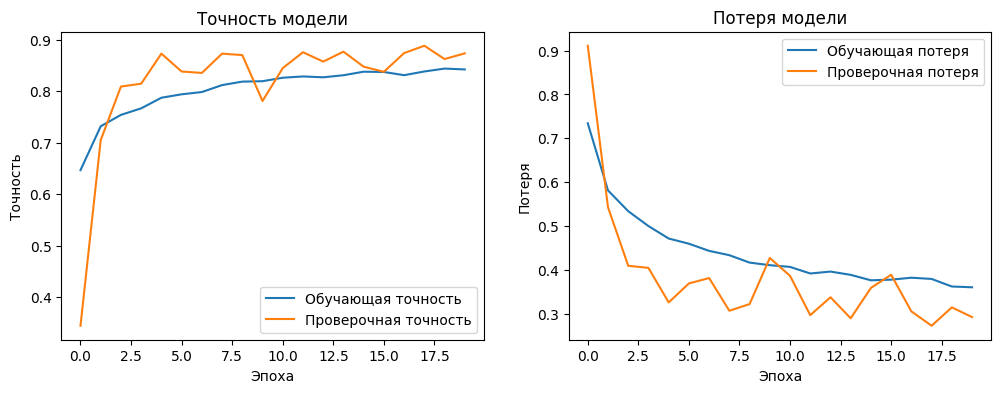

In [ ]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучающая точность')
plt.plot(history.history['val_accuracy'], label='Проверочная точность')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучающая потеря')
plt.plot(history.history['val_loss'], label='Проверочная потеря')
plt.title('Потеря модели')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

plt.show()